In [4]:
#Scenario: using exploratory analysis and statistics methods, identify predictors for a car price.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 

In [6]:
df = pd.read_csv(r'C:\Users\krzys\Desktop\automobileEDA.csv')

Pre-processing

In [7]:
#Check datatypes
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [8]:
#Check missing values
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

#Fix missing values in stroke column
df.interpolate(inplace=True)  #fix missing in stroke
df.drop(['horsepower-binned'], inplace=True, axis=1)

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-system, dtype: int64

bore
False    201
Name: bore, dtype:

Correlation analysis

In [9]:
#Quick look on correlations
df_corr = df.corr()
df_corr.sort_values(by=['price'])

#Only the following numerical variables should be considered in further analysis (due to moderate or strong 
#positive/negative correlation): length, width, curb-weight, engine-size, horsepower, city-mpg, highway-mpg, 
#wheel-base, bore.

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
highway-mpg,0.036233,-0.181877,-0.543304,-0.698142,-0.680635,-0.104812,-0.794889,-0.679571,-0.591309,-0.035665,0.268465,-0.804575,-0.058598,0.972044,1.000000,-0.704692,-0.930028,0.198690,-0.198690
city-mpg,-0.035527,-0.225016,-0.470606,-0.665192,-0.633531,-0.049800,-0.749543,-0.650546,-0.582027,-0.035333,0.331425,-0.822214,-0.115413,1.000000,0.972044,-0.686571,-0.949713,0.265676,-0.265676
gas,0.196735,0.101546,-0.307237,-0.211187,-0.244356,-0.281578,-0.221046,-0.070779,-0.054458,-0.240684,-0.985231,0.169053,0.475812,-0.265676,-0.198690,-0.110326,0.241282,-1.000000,1.000000
peak-rpm,0.279740,0.239543,-0.360305,-0.285970,-0.245800,-0.309974,-0.279361,-0.256733,-0.267392,-0.061840,-0.435780,0.107885,1.000000,-0.115413,-0.058598,-0.101616,0.115830,-0.475812,0.475812
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.006564,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
compression-ratio,-0.182196,-0.114713,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001263,0.187638,1.000000,-0.214514,-0.435780,0.331425,0.268465,0.071107,-0.299372,0.985231,-0.985231
stroke,-0.006564,0.055836,0.157438,0.123525,0.188681,-0.062214,0.167397,0.204933,-0.055376,1.000000,0.187638,0.099424,-0.061840,-0.035333,-0.035665,0.082982,0.038001,0.240684,-0.240684
diesel,-0.196735,-0.101546,0.307237,0.211187,0.244356,0.281578,0.221046,0.070779,0.054458,0.240684,0.985231,-0.169053,-0.475812,0.265676,0.198690,0.110326,-0.241282,1.000000,-1.000000
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055836,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062214,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578


In [10]:
#Detailed Pearson correlation analysis

print('Length')
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("Correlation Coefficient:", pearson_coef, " P-value:", p_value)
print(" ")
#Since the p-value is < 0.001, the correlation between length and price is statistically
#significant, and the linear relationship is moderately strong (~0.691).

print('Width')
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("Correlation Coefficient:", pearson_coef, " P-value:", p_value)
print(" ")
#Since the p-value is < 0.001, the correlation between width and price is statistically 
#significant, and the linear relationship is quite strong (~0.751).

print('Curb-weight')
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "Correlation Coefficient:", pearson_coef, " P-value:", p_value)
print(" ")
#Since the p-value is < 0.001, the correlation between curb-weight and price is statistically 
#significant, and the linear relationship is quite strong (~0.834).

print('Engine-size')
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("Correlation Coefficient:", pearson_coef, " P-value:", p_value) 
print(" ")
#Since the p-value is < 0.001, the correlation between engine-size and price is statistically 
#significant, and the linear relationship is very strong (~0.872).

print('Horsepower')
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("Correlation Coefficient:", pearson_coef, " P-value:", p_value)
print(" ") 
#Since the p-value is < 0.001, the correlation between horsepower and price is statistically 
#significant, and the linear relationship is quite strong (~0.809, close to 1).

print('City-mpg')
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("Correlation Coefficient:", pearson_coef, " P-value:", p_value) 
print(" ")
#Since the p-value is < 0.001, the correlation between city-mpg and price is statistically 
#significant, and the coefficient of about -0.687 shows that the relationship is negative and
#moderately strong.

print('Highway-mpg')
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "Correlation Coefficient:", pearson_coef, " P-value:", p_value)
print(" ") 
#Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically 
#significant, and the coefficient of about -0.705 shows that the relationship is negative and 
#moderately strong.

print("Wheel-base")
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("Correlation Coefficient:", pearson_coef, " P-value:", p_value)  
print(" ")
#Since the p-value is < 0.001, the correlation between wheel-base and price is statistically 
#significant, although the linear relationship isn't extremely strong (~0.585).

print('Bore')
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("Correlation Coefficient:", pearson_coef, " P-value:", p_value) 
#Since the p-value is < 0.001, the correlation between bore and price is statistically 
#significant, but the linear relationship is only moderate (~0.521)

Length
Correlation Coefficient: 0.690628380448364  P-value: 8.016477466158986e-30
 
Width
Correlation Coefficient: 0.7512653440522674  P-value: 9.200335510481516e-38
 
Curb-weight
Correlation Coefficient: 0.8344145257702846  P-value: 2.1895772388936914e-53
 
Engine-size
Correlation Coefficient: 0.8723351674455185  P-value: 9.265491622198389e-64
 
Horsepower
Correlation Coefficient: 0.809574567003656  P-value: 6.369057428259557e-48
 
City-mpg
Correlation Coefficient: -0.6865710067844677  P-value: 2.321132065567674e-29
 
Highway-mpg
Correlation Coefficient: -0.7046922650589529  P-value: 1.7495471144477352e-31
 
Wheel-base
Correlation Coefficient: 0.5846418222655081  P-value: 8.076488270732989e-20
 
Bore
Correlation Coefficient: 0.5431553832626602  P-value: 8.049189483935489e-17


Plotting

(0.0, 47866.90579174992)

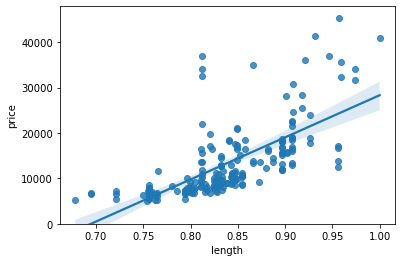

In [11]:
sns.regplot(x="length", y="price", data=df)
plt.ylim(0,)

(0.0, 47919.54446023357)

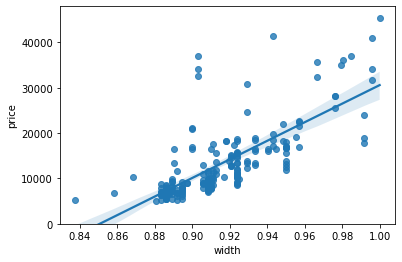

In [12]:
sns.regplot(x="width", y="price", data=df)
plt.ylim(0,)

(0.0, 47757.30582936635)

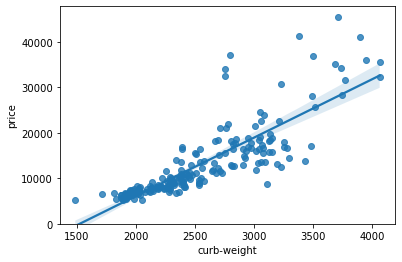

In [13]:
sns.regplot(x="curb-weight", y="price", data=df)
plt.ylim(0,)

(0.0, 53351.58197047367)

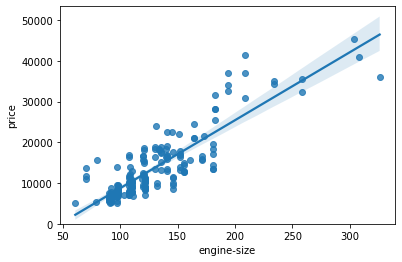

In [14]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

(0.0, 47538.43679598939)

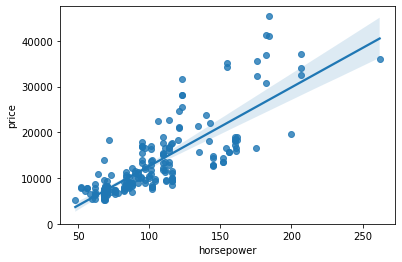

In [15]:
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

(0.0, 48258.0780128798)

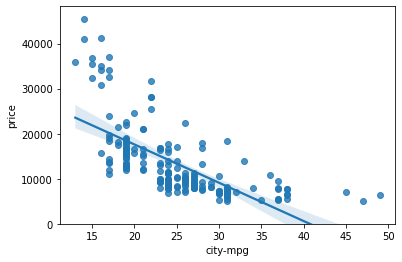

In [16]:
sns.regplot(x="city-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 48172.12855552668)

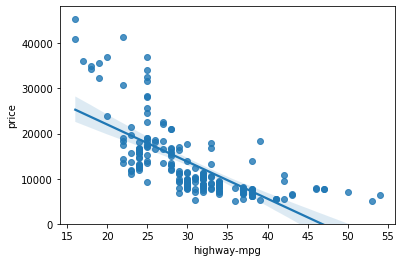

In [17]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47613.38224259145)

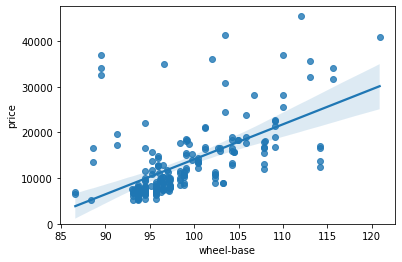

In [18]:
sns.regplot(x="wheel-base", y="price", data=df)
plt.ylim(0,)

(0.0, 47796.70783065805)

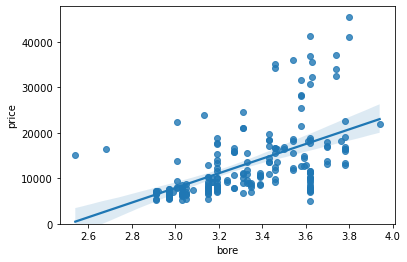

In [19]:
sns.regplot(x="bore", y="price", data=df)
plt.ylim(0,)

Categorical variables

In [20]:
#Categorical variables:
#make, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders, fuel-system

#Try to exclude variables that are not appropriate for predictors

<AxesSubplot:xlabel='make', ylabel='price'>

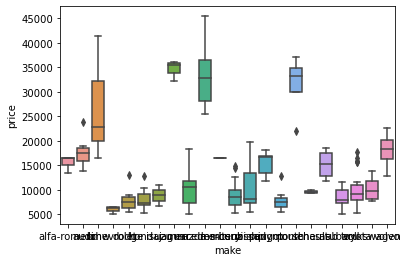

In [21]:
#Make
sns.boxplot(x="make", y="price", data=df)
#exclude due to overlapping

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

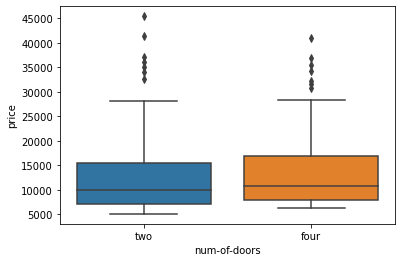

In [22]:
#Num-of-doors
sns.boxplot(x="num-of-doors", y="price", data=df)
#exclude due to overlapping

<AxesSubplot:xlabel='body-style', ylabel='price'>

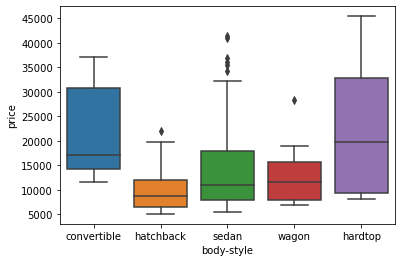

In [23]:
#Body-style
sns.boxplot(x="body-style", y="price", data=df)
#exclude due to overlapping

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

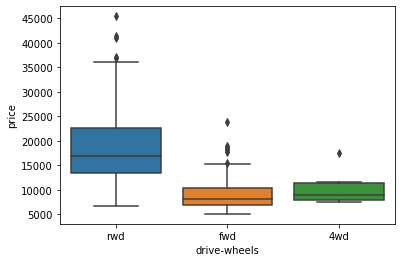

In [24]:
#Drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

In [25]:
#Count per drive-wheels
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [26]:
#Average price for drive-wheels
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one.rename(columns={'price': 'avg price'}, inplace=True)
df_group_one

,drive-wheels,avg price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [27]:
#Average price for drive-wheels and body-style
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'], as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

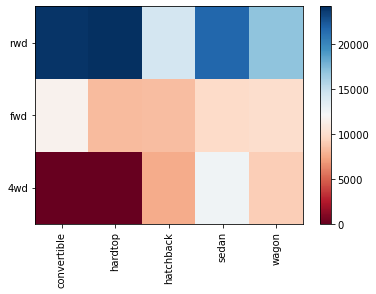

In [28]:
#average price for body-style, heatmap to better understand distribution
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [29]:
#ANOVA for drive-wheels
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
print( "ANOVA results: F =", f_val, "| P =", p_val) 

#A large F-test score shows a strong correlation and a P-value of almost 0 implies almost certain statistical significance. 

ANOVA results: F = 67.95406500780399 | P = 3.3945443577151245e-23


In [30]:
#ANOVA for drive-wheels / fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F =", f_val, "| P =", p_val )

ANOVA results: F = 130.5533160959111 | P = 2.2355306355677845e-23


In [31]:
#ANOVA for drive-wheels / 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F =", f_val, "| P =", p_val)   

ANOVA results: F = 8.580681368924756 | P = 0.004411492211225333


In [32]:
#ANOVA for drive-wheels / 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F =", f_val, "| P =", p_val)  

ANOVA results: F = 0.665465750252303 | P = 0.41620116697845666


<AxesSubplot:xlabel='engine-location', ylabel='price'>

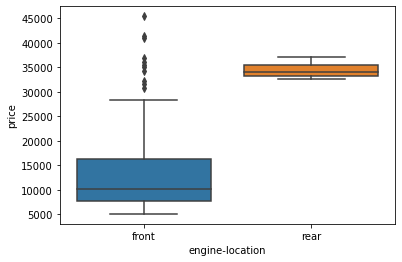

In [33]:
#Engine-location
sns.boxplot(x="engine-location", y="price", data=df)

In [34]:
#Count per engine-location
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

#exclude becasue there are only 3 rears

,value_counts
engine-location,
front,198
rear,3


<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

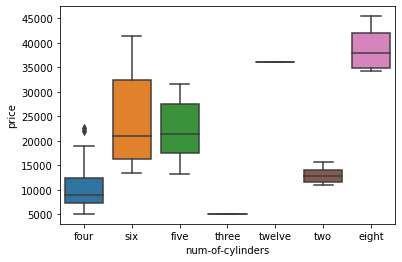

In [35]:
#Num-of-cylinders
sns.boxplot(x="num-of-cylinders", y="price", data=df)

In [36]:
#Count per num-of-cylinders
engine_loc_counts = df['num-of-cylinders'].value_counts().to_frame()
engine_loc_counts.rename(columns={'num-of-cylinders': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'num-of-cylinders'
engine_loc_counts

#exclude becasue most models fall into four cylinders category

,value_counts
num-of-cylinders,
four,157
six,24
five,10
two,4
eight,4
three,1
twelve,1


<AxesSubplot:xlabel='fuel-system', ylabel='price'>

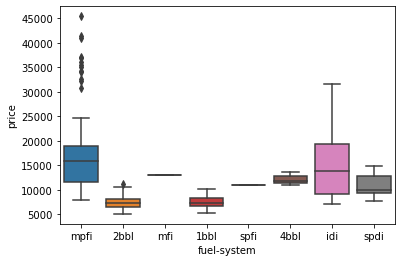

In [37]:
#Fuel-system
sns.boxplot(x="fuel-system", y="price", data=df)
#exclude due to overlapping

In [38]:
#Conclusion

#The following should be considered as predictors:

#----Numerical----

#   Length
#   Width
#   Curb-weight
#   Engine-size
#   Horsepower
#   City-mpg
#   Highway-mpg
#   Wheel-base
#   Bore

#----Categorical----

#   Drive-wheels